### Importing relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Loading data from csv

In [2]:
data = np.loadtxt("RegData.csv",delimiter=',')
data2 = np.loadtxt("MultipleLR.csv",delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

### Specifying inputs and targets

In [4]:
x=data[:,:1]
y=data[:,1:2]
x

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

### Defining batch function

In [5]:
def batch(x,size):
    
    if x.shape[0]%size==0:
        iterations= x.shape[0]//size
    else:
        iterations = x.shape[0]//size +1
    
    
    batches=[]
    start=0
    end=size
    
    for i in range(iterations):
        
        batches.append(x[start:end])
        start+=size
        end+=size
        
    return (iterations,batches)
    

### Defining linear regression function

### The function can be used for batch, stochastic or mini batch GD

In [6]:
def fit(x,y,batch_size=x.shape[0],max_epochs=100,learning_rate=0.001):
    
    error=[]
    max_epochs=max_epochs
    alpha=learning_rate
    x_batches =batch(x,size=batch_size)[1]
    y_batches =batch(y,size=batch_size)[1]
    max_iterations = batch(x,size=batch_size)[0]
    theta1 = np.zeros(shape=(x.shape[1],1))
    theta0= np.zeros(shape=(1,1))


    for i in range(max_epochs):
        for j in range(max_iterations):

            x1 = x_batches[j]
            y1 = y_batches[j]
            m = x1.shape[0]
            h = x1@theta1+theta0
            loss= 1/(2*m) * (np.linalg.norm(h-y1))**2
            gradient1 = (1/m) * x1.T@(h-y1)
            gradient0 = (1/m)* sum(h-y1)
            theta1 = theta1- alpha*gradient1
            theta0 = theta0 - alpha*gradient0
        
        
        h= x@theta1+theta0
        loss= 1/(2*x.shape[0]) * (np.linalg.norm(h-y))**2
        error.append(loss)
        

    plt.plot(range(1,len(error)+1),error)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    plt.scatter(h,y)
    plt.xlabel("predictions")
    plt.ylabel("targets")
    plt.grid()
    plt.show()

    print("mean squared error equals: ",loss,'\n')
    print("R_squared equals: ",r2_score(h,y),end='\n\n')
    print(*error,sep='\n')
    return {'theta1':theta1,'theta0':theta0}


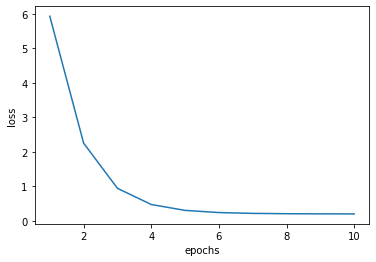

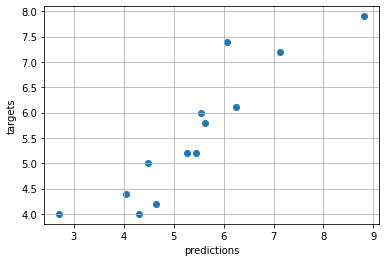

mean squared error equals:  0.20370881313412106 

R_squared equals:  0.8077696249390982

5.93245783506523
2.2552188046464883
0.9459754360389563
0.47648113116471924
0.30613297841958986
0.24314697841013364
0.21916034112203397
0.20961272827216268
0.20556788162144882
0.20370881313412106


{'theta1': array([[0.88356914]]), 'theta0': array([[0.1489074]])}

In [7]:
fit(x,y,1,10)

### Momentum

In [117]:
error=[]
m=x.shape[0]
max_iter=1000
alpha=0.0005
theta1 = np.zeros(shape=(x.shape[1],1))
theta0= np.zeros(shape=(1,1))
gamma=0.99
v1=0
v0=0

for i in range(max_iter):
    
    
    
    h = x@theta1+theta0
    loss= 1/(2*m) * (np.linalg.norm(h-y))**2
    gradient1 = (1/m) * x.T@(h-y)
    gradient0 = (1/m)* sum(h-y)
    
    v1= alpha*gradient1 + gamma*v1
    v0= alpha*gradient0 + gamma*v0
    
    theta1 = theta1 - v1
    theta0 = theta0 - v0

    
    
    error.append(loss)
    print(loss)

16.305384479692314
15.681993489159845
14.489643534133547
12.825790985099431
10.82251524040804
8.635604286291859
6.4320220777945885
4.37676014565822
2.6201035560415775
1.2862887736050101
0.46440377208125816
0.20219023269086897
0.5031698769750502
1.3272512465095356
2.594700695149881
4.193103234522362
5.98671486596917
7.827434804518589
9.5665159524495
11.066092373663338
12.209635019674147
12.91054761273693
13.118274253061523
12.821495450898906
12.048223105355325
10.862848788128431
9.360434466255759
7.658742518722385
5.8886670252408715
4.183838896469543
2.6702259972551454
1.4565334611811955
0.6261314250457322
0.23110469597012
0.2888427652084563
0.781383597245239
1.657507194083383
2.8373621424345328
4.2192165767111485
5.687768661143041
7.123342206777127
8.41123793731021
9.450513385039228
10.16152309805904
10.491660108962597
10.418889988386045
9.95284782480265
9.133461706420302
8.027258489870212
6.721683964296705
5.317916624594014
3.922761347305511
2.640268824108565
1.563734985567252
0.76869

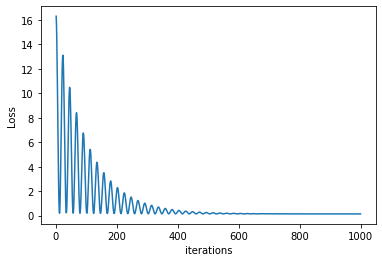

In [118]:
plt.plot(range(1,len(error)+1),error)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

### NAG [Nesterov accelerated gradient descent]

In [115]:
error=[]
m=x.shape[0]
max_iter=1000
alpha=0.0005
theta1 = np.zeros(shape=(x.shape[1],1))
theta0= np.zeros(shape=(1,1))
gamma=0.99
v1=0
v0=0

for i in range(max_iter):
    
    
    
    h = x@theta1+theta0
    loss= 1/(2*m) * (np.linalg.norm(h-y))**2
    gradient1 = (1/m) * x.T@(h-y)
    gradient0 = (1/m)* sum(h-y)
    
    v1 = gamma*v1 + alpha*gradient1    
    v0 = gamma*v0 + alpha*gradient0
    
    theta1 = theta1-gamma*v1
    theta0 = theta0 -gamma*v0

    h = x@theta1+theta0
    gradient1 = (1/m) * x.T@(h-y)
    gradient0 = (1/m)* sum(h-y)

    theta1= theta1- alpha*gradient1
    theta0 = theta0 -alpha*gradient0

#     v1 = gamma*v1 + alpha*gradient1    
#     v0 = gamma*v0 + alpha*gradient0

    
    
    error.append(loss)
    print(loss)

16.305384479692314
15.088668806823236
13.410316738887639
11.40597492027615
9.228458019441169
7.0352520201428534
4.976389576321225
3.1835874469149648
1.7613896625770948
0.7808662688342444
0.2761935547037081
0.2442061905911111
0.6467830366310483
1.415723339095881
2.4596026574184484
3.6719785624839565
4.940251106836112
6.1544740405504905
7.215457171544298
8.04159171435227
8.573959342199037
8.779440100094098
8.651701261287647
8.210115344145246
7.4968084067474186
6.572168672515677
5.509242204421795
4.387501337118621
3.2864906395658826
2.2798351917242368
1.4300406792880074
0.7844304374787132
0.37245913471180697
0.20452542519285202
0.27228612919317957
0.5503614647306787
0.9992226632115531
1.5689764778525888
2.203710177211226
2.846037936377946
3.441495167187243
3.942459205596182
4.311328984400967
4.522767495337929
4.564892653907092
4.439387857364862
4.160586406199551
3.753657972787935
3.2520853962391727
2.6946625466435328
2.12226666233585
1.5746608621903593
1.0875654763485088
0.690202825271162

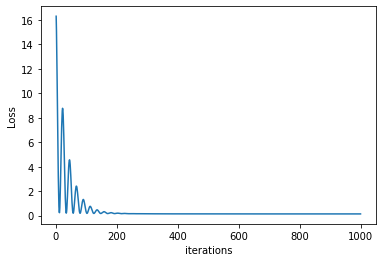

In [116]:
plt.plot(range(1,len(error)+1),error)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

#### As we NAG reduces the oscillations produced by large momentum value and helps in reaching the minimum faster than momentum based gradient descent 